# Importing Dependencies

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Preprocessing

## Loading the dataset and preprocessing vgsales.csv

In [16]:
df_vgsales = pd.read_csv("C:/Users/Chetan Vemula/Desktop/VS Code Python/Steam_Games_Prediction_And_Recommendation/Datasets/vgsales.csv")
df_vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nan_count_vgsales = df_vgsales.isna().sum()
print(nan_count_vgsales)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [18]:
df_vgsales.dropna(inplace=True)
df_vgsales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


## Loading and preprocessing the publisher.csv

In [19]:
df_publisher = pd.read_csv("C:/Users/Chetan Vemula/Desktop/VS Code Python/Steam_Games_Prediction_And_Recommendation/Datasets/publisher.csv", encoding = 'latin-1')
df_publisher.head()

,Publisher,Headquarters,Est.,Notable games published,Notes,Active
0,07th Expansion,Japan,2002,Higurashi When They Cry Umineko When They Cry...,NaN,1
1,11 bit studios,"Warsaw , Poland",2010,Frostpunk This War of Mine Moonlighter,"Also a video game developer, marketer, and dis...",1
2,1C Company,"Moscow, Russia",1991,Il-2 seriesMen of War series,Specializes in localization for Russia.,1
3,2K Games,"Novato, California, United States",2005,NaN,"Also a video game developer, marketer, and dis...",1
4,3D Realms,"Garland, Texas, United States",1987,Duke Nukem series,Also a video game developer. Also known as Apo...,1


In [20]:
nan_count_publisher = df_publisher.isna().sum()
print(nan_count_publisher)

Publisher                    0
Headquarters                 1
Est.                         0
Notable games published    138
Notes                      164
Active                       0
dtype: int64


In [21]:
df_publisher.dropna(inplace=True)
df_publisher

,Publisher,Headquarters,Est.,Notable games published,Notes,Active
1,11 bit studios,"Warsaw , Poland",2010,Frostpunk This War of Mine Moonlighter,"Also a video game developer, marketer, and dis...",1
2,1C Company,"Moscow, Russia",1991,Il-2 seriesMen of War series,Specializes in localization for Russia.,1
4,3D Realms,"Garland, Texas, United States",1987,Duke Nukem series,Also a video game developer. Also known as Apo...,1
5,The 3DO Company,"Redwood City, California, United States",1991,Army Men,Also a video game and video game console devel...,0
7,5pb.,"Tokyo, Japan",2005,Memories Off,"Label of KID until 2006, and of Cyberfront sin...",1
...,...,...,...,...,...,...
838,ZAPiT Games,"Mississauga, Ontario, Canada",2003,Game Wave Family Entertainment System,Defunct.,0
839,ZeniMax Media,United States,1999,Elder Scrolls,Also owns publisher Bethesda Softworks.,1
841,Zeppelin Games,"Gateshead, UK",1987,Draconus,Acquired by Merit Studios Inc. in 1994 and ren...,0
842,Zigurat,Spain,1986,Various ZX Spectrum games,Published last game in 1992.,0


## Removing the inactive publishers from vgsales.csv using df_publisher


In [22]:
active_publisher = df_publisher[df_publisher['Active'] == 1]['Publisher'].tolist()

In [23]:
# Filter vgsales_cleaned based on active publishers
df_vgsales_active = df_vgsales[df_vgsales['Publisher'].isin(active_publisher)]
df_vgsales_active

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16588,Transformers: Fall of Cybertron,PC,2012.0,Action,Activision,0.01,0.00,0.00,0.00,0.01,78.0,13.0,7.9,121.0,"High Moon Studios, Mercenary Technologies",T
16595,Micro Machines V4,PS2,2006.0,Racing,Codemasters,0.01,0.00,0.00,0.00,0.01,64.0,35.0,6.8,8.0,Supersonic Software,E
16601,Saints Row: Gat out of Hell,XOne,2015.0,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01,65.0,16.0,6,27.0,Volition Inc.,M
16644,Hospital Tycoon,PC,2007.0,Strategy,Codemasters,0.00,0.01,0.00,0.00,0.01,51.0,8.0,3.8,29.0,Big Red Software,E10+


# Training Model


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train_and_predict(df_vgsales_active, publisher, year):
    """Trains the model and predicts sales for a given publisher and future year."""

    # Filter data for the selected publisher and year range
    filtered_df = df_vgsales_active[(df_vgsales_active['Publisher'] == publisher) & (df_vgsales_active['Year_of_Release'] <= year)]
    filtered_df = filtered_df.sort_values(by="Year_of_Release")

    # Prepare features (X) and target variable (y)
    X = filtered_df[['Year_of_Release']]
    y = filtered_df['Global_Sales']

    # Train-test split (adjust test_size as needed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Model Training
    model = LinearRegression()  # Choose your model here
    model.fit(X_train, y_train)

    # Predictions on Training and Test Data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Model Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("Model Evaluation:")
    print(f"  Training MSE: {train_mse:.2f}")
    print(f"  Test MSE: {test_mse:.2f}")
    print(f"  Training R-squared: {train_r2:.2f}")
    print(f"  Test R-squared: {test_r2:.2f}")


    return model, filtered_df

model, filtered_df = train_and_predict(df_vgsales_active, "Nintendo", 2023)  # Example values


Model Evaluation:
  Training MSE: 29.21
  Test MSE: 118.35
  Training R-squared: 0.00
  Test R-squared: -0.01


# Graph

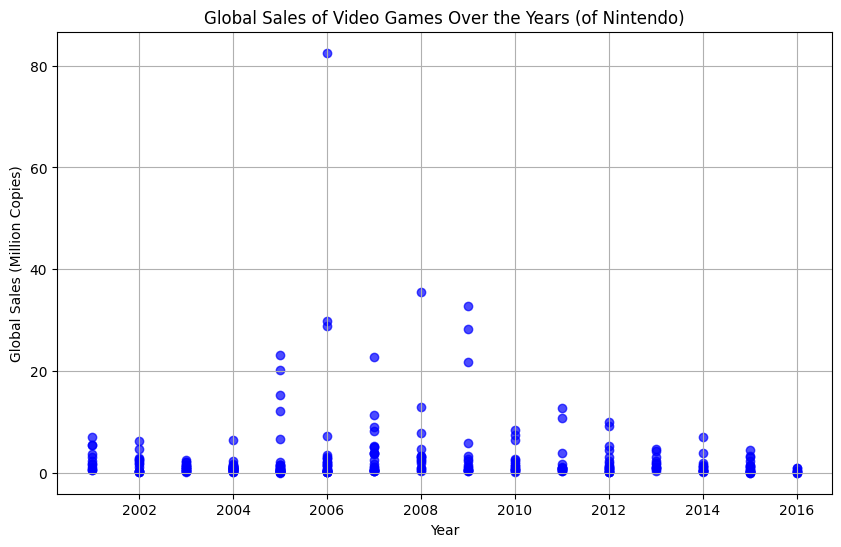

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["Year_of_Release"], filtered_df["Global_Sales"], color='blue', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Global Sales (Million Copies)")
plt.title("Global Sales of Video Games Over the Years (of Nintendo)")
plt.grid(True)
plt.show()

# Make a predictive system


In [26]:
import numpy as np

# ... (Your existing train_and_predict function and data loading)

# Get user input for publisher and year to predict
publisher = input("Enter the publisher name: ")
year_to_predict = int(input("Enter the year to predict sales for: "))

# Train the model on data up to the current year (e.g., 2023)
model, _ = train_and_predict(df_vgsales_active, publisher, 2023)  # Adjust the year if needed

# Prepare the input data for prediction
input_data = np.array([year_to_predict])  # Create a NumPy array with the year
input_data_reshaped = input_data.reshape(1, -1)  # Reshape for the model

# Make the prediction
prediction = model.predict(input_data_reshaped)

# Print the prediction in a similar format to your example
print(f"\nPredicted sales for {publisher} in {year_to_predict}: {prediction[0]:.2f} Million Copies")


Model Evaluation:
  Training MSE: 29.21
  Test MSE: 118.35
  Training R-squared: 0.00
  Test R-squared: -0.01

Predicted sales for Nintendo in 2023: 2.09 Million Copies


C:\Users\Chetan Vemula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Saving the trained model

In [27]:
import pickle

In [28]:
filename = 'Steam_Developer_Model.sav'
pickle.dump(model, open(filename, 'wb'))

In [29]:
# loading the saved model parameters (intercept and slope)
loaded_model = pickle.load(open('Steam_Developer_Model.sav', 'rb'))

In [30]:
# Get user input for publisher and year to predict
publisher = input("Enter the publisher name: ")
year_to_predict = int(input("Enter the year to predict sales for: "))

# Prepare the input data for prediction
input_data = np.array([year_to_predict])  # Create a NumPy array with the year
input_data_reshaped = input_data.reshape(1, -1)  # Reshape for the model

# Make the prediction
prediction = loaded_model.predict(input_data_reshaped)

# Print the prediction in a similar format to your example
print(f"\nPredicted sales for {publisher} in {year_to_predict}: {prediction[0]:.2f} Million Copies")


Predicted sales for Nintendo in 2023: 2.09 Million Copies


C:\Users\Chetan Vemula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
